# Data Manipulation with pandas

In [1]:
# Setup header
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from matplotlib.ticker import StrMethodFormatter

# pd.set_option('display.max_rows', None)

avocados = pd.read_pickle('avoplotto.pkl')
homelessness = pd.read_csv('homelessness.csv', index_col=0)
sales = pd.read_csv('sales_subset.csv', index_col=0)
temperatures = pd.read_csv('temperatures.csv', index_col=0)

sales['date'] = pd.to_datetime(sales['date'])
temperatures['date'] = pd.to_datetime(temperatures['date'])

def unfuck_axis(axis):
    plt.ticklabel_format(axis=axis, style='plain')
    axis_object = getattr(plt.gca(), (f'{axis}axis'))
    axis_object.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

## Transforming `DataFrame`s

### Inspecting a `DataFrame`

Here are a few ways to summarize pandas `DataFrame`s. `.head()` gives a quick rundown of what the `DataFrame` looks like without any attempt at summarizing the data:

In [2]:
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


`.info()` will show the type of each column and give the user an idea of how many missing values there are:

In [3]:
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB


`.shape` is a tuple with the number of rows and columns in the `DataFrame`. Note that `.shape` is an attribute rather than a method:

In [4]:
homelessness.shape

(51, 5)

Lastly `.describe()` gives summary statistics of the *numerical* columns:

In [5]:
homelessness.describe()

,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3504.882353,6.405637e+06
std,15991.025083,7805.411811,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,592.000000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


### Parts of a `DataFrame`

`.values` gives a "raw" NumPy array of the content of the `DataFrame`:

In [6]:
homelessness.values

array([['East South Central', 'Alabama', 2570.0, 864.0, 4887681],
       ['Pacific', 'Alaska', 1434.0, 582.0, 735139],
       ['Mountain', 'Arizona', 7259.0, 2606.0, 7158024],
       ['West South Central', 'Arkansas', 2280.0, 432.0, 3009733],
       ['Pacific', 'California', 109008.0, 20964.0, 39461588],
       ['Mountain', 'Colorado', 7607.0, 3250.0, 5691287],
       ['New England', 'Connecticut', 2280.0, 1696.0, 3571520],
       ['South Atlantic', 'Delaware', 708.0, 374.0, 965479],
       ['South Atlantic', 'District of Columbia', 3770.0, 3134.0, 701547],
       ['South Atlantic', 'Florida', 21443.0, 9587.0, 21244317],
       ['South Atlantic', 'Georgia', 6943.0, 2556.0, 10511131],
       ['Pacific', 'Hawaii', 4131.0, 2399.0, 1420593],
       ['Mountain', 'Idaho', 1297.0, 715.0, 1750536],
       ['East North Central', 'Illinois', 6752.0, 3891.0, 12723071],
       ['East North Central', 'Indiana', 3776.0, 1482.0, 6695497],
       ['West North Central', 'Iowa', 1711.0, 1038.0, 3148618]

`.columns` gives a pandas `Index` object for the columns of the `DataFrame`:

In [7]:
homelessness.columns

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

`.index` gives an index for the rows, which will consist either of row numbers or row names:

In [8]:
homelessness.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype='int64')

pandas `Index` objects are a subtle topic that will receive a lot more treatment later.

### Sorting rows

`.sort_values()` with one argument will sort a `DataFrame` by that column, ascending. For example:

In [9]:
homelessness.sort_values('individuals')

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434.0,205.0,577601
34,West North Central,North Dakota,467.0,75.0,758080
7,South Atlantic,Delaware,708.0,374.0,965479
39,New England,Rhode Island,747.0,354.0,1058287
45,New England,Vermont,780.0,511.0,624358
...,...,...,...,...,...
47,Pacific,Washington,16424.0,5880.0,7523869
43,West South Central,Texas,19199.0,6111.0,28628666
9,South Atlantic,Florida,21443.0,9587.0,21244317
32,Mid-Atlantic,New York,39827.0,52070.0,19530351


Descending order can be achieved almost as easily with the `ascending` keyword argument:

In [10]:
homelessness.sort_values('family_members', ascending=False)

,region,state,individuals,family_members,state_pop
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,Pacific,California,109008.0,20964.0,39461588
21,New England,Massachusetts,6811.0,13257.0,6882635
9,South Atlantic,Florida,21443.0,9587.0,21244317
43,West South Central,Texas,19199.0,6111.0,28628666
...,...,...,...,...,...
24,East South Central,Mississippi,1024.0,328.0,2981020
41,West North Central,South Dakota,836.0,323.0,878698
48,South Atlantic,West Virginia,1021.0,222.0,1804291
50,Mountain,Wyoming,434.0,205.0,577601


### Subsetting columns

Individual columns can be extracted as `Series` objects using square bracket indexing:

In [11]:
homelessness['individuals']

0       2570.0
1       1434.0
2       7259.0
3       2280.0
4     109008.0
        ...   
46      3928.0
47     16424.0
48      1021.0
49      2740.0
50       434.0
Name: individuals, Length: 51, dtype: float64

`DataFrame`s can be subsetted using a `list` to index the original `DataFrame`:

In [12]:
homelessness[['state', 'family_members']]

,state,family_members
0,Alabama,864.0
1,Alaska,582.0
2,Arizona,2606.0
3,Arkansas,432.0
4,California,20964.0
...,...,...
46,Virginia,2047.0
47,Washington,5880.0
48,West Virginia,222.0
49,Wisconsin,2167.0


Note that this approach can be used to subset `DataFrame`s with one column, as opposed to extracting `Series` objects as described above:

In [13]:
homelessness[['state']]

,state
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
...,...
46,Virginia
47,Washington
48,West Virginia
49,Wisconsin


### Subsetting rows

Rows of a `DataFrame` can be subsetted using a `Series` of `bool`s. Here's a simple example:

In [14]:
homelessness[homelessness['individuals'] > 10_000]

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008.0,20964.0,39461588
9,South Atlantic,Florida,21443.0,9587.0,21244317
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
37,Pacific,Oregon,11139.0,3337.0,4181886
43,West South Central,Texas,19199.0,6111.0,28628666
47,Pacific,Washington,16424.0,5880.0,7523869


Here's another example:

In [15]:
homelessness[homelessness['region'] == 'Mountain']

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
5,Mountain,Colorado,7607.0,3250.0,5691287
12,Mountain,Idaho,1297.0,715.0,1750536
26,Mountain,Montana,983.0,422.0,1060665
28,Mountain,Nevada,7058.0,486.0,3027341
31,Mountain,New Mexico,1949.0,602.0,2092741
44,Mountain,Utah,1904.0,972.0,3153550
50,Mountain,Wyoming,434.0,205.0,577601


Here's a more complicated example using two `Series` of `bools` joined with a Boolean "and" operation. **Note the necessity of parentheses and to use `&` instead of `and`**:

In [16]:
homelessness[(homelessness['family_members'] < 1000) & (homelessness['region'] == 'Pacific')]

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434.0,582.0,735139


### Subsetting rows by categorical variables

Multiple values of a categorical variable can be matched using the `.isin()` method of pandas `Series` objects:

In [17]:
# Subset the Mojave Desert states
homelessness[homelessness['state'].isin(['California', 'Arizona', 'Nevada', 'Utah'])]

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
4,Pacific,California,109008.0,20964.0,39461588
28,Mountain,Nevada,7058.0,486.0,3027341
44,Mountain,Utah,1904.0,972.0,3153550


### Adding new columns

Here, a `total` column is added to the `homelessness` `DataFrame`:

In [18]:
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']
homelessness

,region,state,individuals,family_members,state_pop,total
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0
1,Pacific,Alaska,1434.0,582.0,735139,2016.0
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0
4,Pacific,California,109008.0,20964.0,39461588,129972.0
...,...,...,...,...,...,...
46,South Atlantic,Virginia,3928.0,2047.0,8501286,5975.0
47,Pacific,Washington,16424.0,5880.0,7523869,22304.0
48,South Atlantic,West Virginia,1021.0,222.0,1804291,1243.0
49,East North Central,Wisconsin,2740.0,2167.0,5807406,4907.0


And here, a `p_homeless` column is added to give *per capita* numbers:

In [19]:
homelessness['p_homeless'] = homelessness['total'] / homelessness['state_pop']
homelessness

,region,state,individuals,family_members,state_pop,total,p_homeless
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.000703
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.002742
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.001378
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.000901
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.003294
...,...,...,...,...,...,...,...
46,South Atlantic,Virginia,3928.0,2047.0,8501286,5975.0,0.000703
47,Pacific,Washington,16424.0,5880.0,7523869,22304.0,0.002964
48,South Atlantic,West Virginia,1021.0,222.0,1804291,1243.0,0.000689
49,East North Central,Wisconsin,2740.0,2167.0,5807406,4907.0,0.000845


### Combo-attack!

The DataCamp instructor's whimsical name for an exercise combining the following operations:

* Adding a column `indiv_per_10k`, containing the number of homeless in each state per 10,000 members of the population
* Subsetting the rows where `indiv_per_10k` is higher than 20 (`high_homelessness`)
* Sorting `high_homelessness` by `indiv_per_10k` in descending order (`high_homelessness_srt`)
* Selecting only the `state` and `indiv_per_10k` columns of `high_homelessness_srt` and saving that subset as `result`

In [20]:
# Remove columns from previous exercise
homelessness = homelessness.drop(['total', 'p_homeless'], axis=1)

homelessness['indiv_per_10k'] = 10000 * homelessness['individuals'] / homelessness['state_pop']
homelessness

,region,state,individuals,family_members,state_pop,indiv_per_10k
0,East South Central,Alabama,2570.0,864.0,4887681,5.258117
1,Pacific,Alaska,1434.0,582.0,735139,19.506515
2,Mountain,Arizona,7259.0,2606.0,7158024,10.141067
3,West South Central,Arkansas,2280.0,432.0,3009733,7.575423
4,Pacific,California,109008.0,20964.0,39461588,27.623825
...,...,...,...,...,...,...
46,South Atlantic,Virginia,3928.0,2047.0,8501286,4.620477
47,Pacific,Washington,16424.0,5880.0,7523869,21.829195
48,South Atlantic,West Virginia,1021.0,222.0,1804291,5.658732
49,East North Central,Wisconsin,2740.0,2167.0,5807406,4.718113


In [21]:
high_homelessness = homelessness[homelessness['indiv_per_10k'] > 20]
high_homelessness

,region,state,individuals,family_members,state_pop,indiv_per_10k
4,Pacific,California,109008.0,20964.0,39461588,27.623825
8,South Atlantic,District of Columbia,3770.0,3134.0,701547,53.738381
11,Pacific,Hawaii,4131.0,2399.0,1420593,29.079406
28,Mountain,Nevada,7058.0,486.0,3027341,23.314189
32,Mid-Atlantic,New York,39827.0,52070.0,19530351,20.392363
37,Pacific,Oregon,11139.0,3337.0,4181886,26.636307
47,Pacific,Washington,16424.0,5880.0,7523869,21.829195


In [22]:
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)
high_homelessness_srt

,region,state,individuals,family_members,state_pop,indiv_per_10k
8,South Atlantic,District of Columbia,3770.0,3134.0,701547,53.738381
11,Pacific,Hawaii,4131.0,2399.0,1420593,29.079406
4,Pacific,California,109008.0,20964.0,39461588,27.623825
37,Pacific,Oregon,11139.0,3337.0,4181886,26.636307
28,Mountain,Nevada,7058.0,486.0,3027341,23.314189
47,Pacific,Washington,16424.0,5880.0,7523869,21.829195
32,Mid-Atlantic,New York,39827.0,52070.0,19530351,20.392363


In [23]:
result = high_homelessness_srt[['state', 'indiv_per_10k']]
result

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189
47,Washington,21.829195
32,New York,20.392363


## Aggregating `DataFrame`s

### Mean and median

First, let's have a quick overview of the `sales` `DataFrame`:

In [24]:
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


Then let's take a look at some "info" for each of the columns 

In [25]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   store                 10774 non-null  int64         
 1   type                  10774 non-null  object        
 2   department            10774 non-null  int64         
 3   date                  10774 non-null  datetime64[ns]
 4   weekly_sales          10774 non-null  float64       
 5   is_holiday            10774 non-null  bool          
 6   temperature_c         10774 non-null  float64       
 7   fuel_price_usd_per_l  10774 non-null  float64       
 8   unemployment          10774 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 768.1+ KB


Now for some aggregation as promised. The mean of `weekly_sales`:

In [26]:
float(sales['weekly_sales'].mean())

23843.95014850566

And the median:

In [27]:
float(sales['weekly_sales'].median())

12049.064999999999

### Summarizing dates

Aggregate statistics on dates are also possible. DataCamp does some voodoo in the background on their lesson for this example which I've replicated in the notebook header by calling to `pd.to_datetime()`:

In [28]:
sales['date'].max()

Timestamp('2012-10-26 00:00:00')

In [29]:
sales['date'].min()

Timestamp('2010-02-05 00:00:00')

### Efficient summaries

Custom aggregation functions are also possible to go beyond built-in functions. Here's an example with interquartile range:

In [30]:
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)


float(sales['temperature_c'].agg(iqr))

16.583333333333336

Aggregation can also be applied to a `DataFrame` with multiple columns rather than just one `Series`:

In [31]:
sales[['temperature_c', 'fuel_price_usd_per_l', 'unemployment']].agg(iqr)

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64

In the same way, multiple functions can be given to `.agg()` (the DataCamp code used `np.median` but `pd.Series.median` doesn't raise a warning):

In [32]:
sales[['temperature_c', 'fuel_price_usd_per_l', 'unemployment']].agg([iqr, pd.Series.median])

,temperature_c,fuel_price_usd_per_l,unemployment
iqr,16.583333,0.073176,0.565
median,16.966667,0.743381,8.099


### Cumulative statistics

To start with, we'll need a subset of `sales` that contains only rows where `store` is `1` and `department` is also `1`:

In [33]:
sales_1_1 = sales[(sales['store'] == 1) & (sales['department'] == 1)]
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


Cumulative statistics will also require that `sales_1_1` be sorted by `date` ascending. The data are already in order but it can't help to be thorough:

In [34]:
sales_1_1 = sales_1_1.sort_values('date')
sales_1_1.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


Now we'll add cumulative sum and cumulative maximum columns drawn from `weekly_sales`:

In [35]:
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()
sales_1_1[['date', 'weekly_sales', 'cum_weekly_sales', 'cum_max_sales']]

,date,weekly_sales,cum_weekly_sales,cum_max_sales
0,2010-02-05,24924.50,24924.50,24924.50
1,2010-03-05,21827.90,46752.40,24924.50
2,2010-04-02,57258.43,104010.83,57258.43
3,2010-05-07,17413.94,121424.77,57258.43
4,2010-06-04,17558.09,138982.86,57258.43
5,2010-07-02,16333.14,155316.00,57258.43
6,2010-08-06,17508.41,172824.41,57258.43
7,2010-09-03,16241.78,189066.19,57258.43
8,2010-10-01,20094.19,209160.38,57258.43
9,2010-11-05,34238.88,243399.26,57258.43


### Dropping duplicates

Removing duplicates can be an important step in analyzing categorical data. Here, `store_types` and `store_departments` represent unique combinations of `store` and `type` and `store` and `department`, respectively, in the `sales` dataset:

In [36]:
store_types = sales.drop_duplicates(['store', 'type'])
store_types

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765
4495,13,A,1,2010-02-05,46761.90,False,-0.261111,0.704283,8.316
5408,14,A,1,2010-02-05,32842.31,False,-2.605556,0.735455,8.992
6293,19,A,1,2010-02-05,21500.58,False,-6.133333,0.780365,8.350
7199,20,A,1,2010-02-05,46021.21,False,-3.377778,0.735455,8.187
8109,27,A,1,2010-02-05,32313.79,False,-2.672222,0.780365,8.237


In [37]:
store_depts = sales.drop_duplicates(['store', 'department'])
store_depts

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106
...,...,...,...,...,...,...,...,...,...
10715,39,A,95,2010-02-05,88385.24,False,6.833333,0.679451,8.554
10727,39,A,96,2010-02-05,21450.05,False,6.833333,0.679451,8.554
10739,39,A,97,2010-02-05,21162.05,False,6.833333,0.679451,8.554
10751,39,A,98,2010-02-05,9023.09,False,6.833333,0.679451,8.554


Perhaps a more interesting/obvious transformation is getting all the unique holiday dates from the `sales` dataset:

In [38]:
holiday_dates = sales[sales['is_holiday'] == True].drop_duplicates('date').sort_values('date')
holiday_dates['date']

2315   2010-02-12
498    2010-09-10
6810   2010-12-31
6820   2011-09-09
691    2011-11-25
6815   2012-02-10
6735   2012-09-07
Name: date, dtype: datetime64[ns]

### Counting categorical variables

Here are a few ways that categorical data can be counted, based on the two `DataFrame`s ensuring uniqueness calculated previously:

In [39]:
store_counts = store_types['type'].value_counts()
store_counts

type
A    11
B     1
Name: count, dtype: int64

`normalize=True` does proportions rather than raw counts:

In [40]:
store_props = store_types['type'].value_counts(normalize=True)
store_props

type
A    0.916667
B    0.083333
Name: proportion, dtype: float64

`sort=True` (on by default, at least as of pandas 2.2.3):

In [41]:
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
dept_counts_sorted

department
1     12
2     12
3     12
4     12
5     12
      ..
37    10
48     8
50     6
39     4
43     2
Name: count, Length: 80, dtype: int64

`sort` and `normalize` can of course be combined:

In [42]:
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
dept_props_sorted

department
1     0.012917
2     0.012917
3     0.012917
4     0.012917
5     0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: proportion, Length: 80, dtype: float64

### What percent of sales occurred at each store type?

Here it is possible to do a summary for each of the three types of store manually then normalize using the sum of all values of `weekly_sales`. I was initially confused that a `list` could be divided by what one might call a "scalar" value, to borrow from Perl terminology. The reason it works is because `sales_all` is an `np.float64`. I am not entirely sure how it works under the hood.

In [43]:
sales_all = sales['weekly_sales'].sum()
sales_A = sales[sales['type'] == "A"]['weekly_sales'].sum()
sales_B = sales[sales['type'] == "B"]['weekly_sales'].sum()
sales_C = sales[sales['type'] == "C"]['weekly_sales'].sum()

sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
sales_propn_by_type

array([0.9098, 0.0902, 0.    ])

### Calculations with .groupby()

Strictly speaking, the above *works*, but it is brittle (values of `type` hard-coded) and tedious and error-prone (violation of the DRY principle). Writing a `for` loop would obviate much of the downsides to the above approach but pandas can do us one better by offering `.groupby()`:

In [44]:
sales_by_type = sales.groupby('type')['weekly_sales'].sum()
sales_by_type

type
A    2.337163e+08
B    2.317840e+07
Name: weekly_sales, dtype: float64

In [45]:
sales_propn_by_type = sales_by_type / sales['weekly_sales'].sum()
sales_propn_by_type

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64

### Multiple grouped summaries

It is possible moreover to use multiple variables after a `.groupby()` operation. Here we group by `type` and compute several aggregate statistics on `weekly_sales` as an example of summarizing only variable:

In [46]:
sales_stats = sales.groupby('type')['weekly_sales'].agg([pd.Series.min, pd.Series.max, pd.Series.mean, pd.Series.median])
sales_stats

,min,max,mean,median
type,,,,
A,-1098.0,293966.05,23674.667242,11943.92
B,-798.0,232558.51,25696.678370,13336.08


In this instance, however, the aggregation is done over `unemployment` and `fuel_price_usd_per_l`:

In [47]:
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([
    pd.Series.min,
    pd.Series.max,
    pd.Series.mean,
    pd.Series.median
])
unemp_fuel_stats

unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348

### Pivoting on one variable

pandas can even emulate the "pivot table" functionality of many spreadsheet software programs. Here, `index` is the variable to group by and `weekly_sales` is the variable of interest to aggregate after grouping. Note that the default aggregation is the arithmetic mean:

In [48]:
mean_sales_by_type = sales.pivot_table(values='weekly_sales', index='type')
mean_sales_by_type

,weekly_sales
type,
A,23674.667242
B,25696.678370


And here, two aggregation functions are explicitly applied. They can be named with strings instead of with explicit method names, which is nice:

In [49]:
mean_med_sales_by_type = sales.pivot_table(values='weekly_sales', index='type', aggfunc=['mean', 'median'])
mean_med_sales_by_type

,mean,median
,weekly_sales,weekly_sales
type,,
A,23674.667242,11943.92
B,25696.678370,13336.08


A second dimension can be introduced with the addition of the `columns` argument:

In [50]:
mean_sales_by_type_holiday = sales.pivot_table(values='weekly_sales', index='type', columns='is_holiday')
mean_sales_by_type_holiday

is_holiday,False,True
type,,
A,23768.583523,590.04525
B,25751.980533,810.70500


### Fill in missing values and sum values with pivot tables

Rather than just have a bunch of `NaN` values, `fill_value` can be set to `0` when appropriate:

In [51]:
sales.pivot_table(values='weekly_sales', index='department', columns='type', fill_value=0)

type,A,B
department,,
1,30961.725379,44050.626667
2,67600.158788,112958.526667
3,17160.002955,30580.655000
4,44285.399091,51219.654167
5,34821.011364,63236.875000
...,...,...
95,123933.787121,77082.102500
96,21367.042857,9528.538333
97,28471.266970,5828.873333


`.pivot_table()` can also calculate partial group aggregates on the margins with `margins=True` (again the default aggregate function is the arithmetic mean):

In [52]:
sales.pivot_table(values='weekly_sales', index='department', columns='type', fill_value=0, margins=True)

type,A,B,All
department,,,
1,30961.725379,44050.626667,32052.467153
2,67600.158788,112958.526667,71380.022778
3,17160.002955,30580.655000,18278.390625
4,44285.399091,51219.654167,44863.253681
5,34821.011364,63236.875000,37189.000000
...,...,...,...
96,21367.042857,9528.538333,20337.607681
97,28471.266970,5828.873333,26584.400833
98,12875.423182,217.428333,11820.590278


## Slicing and Indexing `DataFrame`s

### Setting and removing indexes

Here the `Index` of `temperatures_ind` is taken from the column `city` in `temperatures`:

In [53]:
temperatures_ind = temperatures.set_index('city')
temperatures_ind

,date,country,avg_temp_c
city,,,
Abidjan,2000-01-01,Côte D'Ivoire,27.293
Abidjan,2000-02-01,Côte D'Ivoire,27.685
Abidjan,2000-03-01,Côte D'Ivoire,29.061
Abidjan,2000-04-01,Côte D'Ivoire,28.162
Abidjan,2000-05-01,Côte D'Ivoire,27.547
...,...,...,...
Xian,2013-05-01,China,18.979
Xian,2013-06-01,China,23.522
Xian,2013-07-01,China,25.251


`.reset_index()` with no arguments performs the inverse operation on a `DataFrame`:

In [54]:
temperatures_ind.reset_index()

,city,date,country,avg_temp_c
0,Abidjan,2000-01-01,Côte D'Ivoire,27.293
1,Abidjan,2000-02-01,Côte D'Ivoire,27.685
2,Abidjan,2000-03-01,Côte D'Ivoire,29.061
3,Abidjan,2000-04-01,Côte D'Ivoire,28.162
4,Abidjan,2000-05-01,Côte D'Ivoire,27.547
...,...,...,...,...
16495,Xian,2013-05-01,China,18.979
16496,Xian,2013-06-01,China,23.522
16497,Xian,2013-07-01,China,25.251
16498,Xian,2013-08-01,China,24.528


Should you desire it, it's also possible to reset the index and drop the column it was created from:

In [55]:
temperatures_ind.reset_index(drop=True)

,date,country,avg_temp_c
0,2000-01-01,Côte D'Ivoire,27.293
1,2000-02-01,Côte D'Ivoire,27.685
2,2000-03-01,Côte D'Ivoire,29.061
3,2000-04-01,Côte D'Ivoire,28.162
4,2000-05-01,Côte D'Ivoire,27.547
...,...,...,...
16495,2013-05-01,China,18.979
16496,2013-06-01,China,23.522
16497,2013-07-01,China,25.251
16498,2013-08-01,China,24.528


### Subsetting with `.loc[]`

The DataCamp course describes the use of `.loc[]` with `Index` and `MultiIndex` objects as its "killer feature". Let's compare subsetting `temperatures` for values of `city` that are either `Moscow` or `Saint Petersburg` without `.loc[]`:

In [56]:
cities = ['Moscow', 'Saint Petersburg']
temperatures[temperatures['city'].isin(cities)]

,date,city,country,avg_temp_c
10725,2000-01-01,Moscow,Russia,-7.313
10726,2000-02-01,Moscow,Russia,-3.551
10727,2000-03-01,Moscow,Russia,-1.661
10728,2000-04-01,Moscow,Russia,10.096
10729,2000-05-01,Moscow,Russia,10.357
...,...,...,...,...
13360,2013-05-01,Saint Petersburg,Russia,12.355
13361,2013-06-01,Saint Petersburg,Russia,17.185
13362,2013-07-01,Saint Petersburg,Russia,17.234
13363,2013-08-01,Saint Petersburg,Russia,17.153


...and with `.loc[]`, using `temperatures_ind`:

In [57]:
temperatures_ind.loc[cities]

,date,country,avg_temp_c
city,,,
Moscow,2000-01-01,Russia,-7.313
Moscow,2000-02-01,Russia,-3.551
Moscow,2000-03-01,Russia,-1.661
Moscow,2000-04-01,Russia,10.096
Moscow,2000-05-01,Russia,10.357
...,...,...,...
Saint Petersburg,2013-05-01,Russia,12.355
Saint Petersburg,2013-06-01,Russia,17.185
Saint Petersburg,2013-07-01,Russia,17.234


### Setting multi-level indexes

Here `temperatures_ind` has a `MultiIndex` consisting first of `country` then of `city`:

In [58]:
temperatures_ind = temperatures.set_index(['country', 'city'])

`temperatures_ind` can now be subsetted with `.loc[]` much as previously:

In [59]:
temperatures_ind.loc[[('Brazil', 'Rio De Janeiro'), ('Pakistan', 'Lahore')]]

date  avg_temp_c
country  city                                 
Brazil   Rio De Janeiro 2000-01-01      25.974
         Rio De Janeiro 2000-02-01      26.699
         Rio De Janeiro 2000-03-01      26.270
         Rio De Janeiro 2000-04-01      25.750
         Rio De Janeiro 2000-05-01      24.356
...                            ...         ...
Pakistan Lahore         2013-05-01      33.457
         Lahore         2013-06-01      34.456
         Lahore         2013-07-01      33.279
         Lahore         2013-08-01      31.511
         Lahore         2013-09-01         NaN

[330 rows x 2 columns]

### Sorting by index values

`.sort_index()` can be used to sort `DataFrame`s by their `Index` or `MultiIndex`. The default behavior is "from the outside in", if that makes sense:

In [60]:
temperatures_ind.sort_index()

date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 2013-07-01      16.299
            Harare 2013-08-01      19.232
            Harare 2013-09-01         NaN

[16500 rows x 2 columns]

The `level` parameter can be used to override default behavior. Here, `temperatures_ind` is sorted by the `city` component of its `MultiIndex`, without regard to `country`:

In [61]:
temperatures_ind.sort_index(level='city')

date  avg_temp_c
country       city                          
Côte D'Ivoire Abidjan 2000-01-01      27.293
              Abidjan 2000-02-01      27.685
              Abidjan 2000-03-01      29.061
              Abidjan 2000-04-01      28.162
              Abidjan 2000-05-01      27.547
...                          ...         ...
China         Xian    2013-05-01      18.979
              Xian    2013-06-01      23.522
              Xian    2013-07-01      25.251
              Xian    2013-08-01      24.528
              Xian    2013-09-01         NaN

[16500 rows x 2 columns]

Here `temperatures_ind` is sorted almost like the default, but with `ascending` overridden:

In [62]:
temperatures_ind.sort_index(level=('country', 'city'), ascending=(True, False))

date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 2013-07-01      16.299
            Harare 2013-08-01      19.232
            Harare 2013-09-01         NaN

[16500 rows x 2 columns]

A subset can be viewed to ensure that the sorting has been done correctly:

In [63]:
temperatures_ind.sort_index(level=('country', 'city'), ascending=(True, False)).loc['United States']

,date,avg_temp_c
city,,
New York,2000-01-01,-3.168
New York,2000-02-01,-0.162
New York,2000-03-01,6.391
New York,2000-04-01,8.897
New York,2000-05-01,15.944
...,...,...
Chicago,2013-05-01,13.734
Chicago,2013-06-01,17.913
Chicago,2013-07-01,21.914


### Slicing index values

First, ensure that the `Index` (or in this case, `MultiIndex`) is sorted:

In [64]:
temperatures_srt = temperatures_ind.sort_index()

Here `temperatures_srt` is subsetted with the outer values of its `MultiIndex` from `Pakistan` to `Russia`. Note that the subsetting is *inclusive* at the end of the interval rather than exclusive as is typical with Python slicing:

In [65]:
temperatures_srt.loc['Pakistan':'Russia']

date  avg_temp_c
country  city                                   
Pakistan Faisalabad       2000-01-01      12.792
         Faisalabad       2000-02-01      14.339
         Faisalabad       2000-03-01      20.309
         Faisalabad       2000-04-01      29.072
         Faisalabad       2000-05-01      34.845
...                              ...         ...
Russia   Saint Petersburg 2013-05-01      12.355
         Saint Petersburg 2013-06-01      17.185
         Saint Petersburg 2013-07-01      17.234
         Saint Petersburg 2013-08-01      17.153
         Saint Petersburg 2013-09-01         NaN

[1155 rows x 2 columns]

Here an attempt is made to subset based solely on the inner values of the `MultiIndex`. It fails, returning rows where the outer value of the `MultiIndex` fall between `Lahore` and `Moscow` (inclusive), as pandas does not recognize such attempts:

In [66]:
temperatures_srt.loc['Lahore':'Moscow']

date  avg_temp_c
country city                             
Mexico  Mexico     2000-01-01      12.694
        Mexico     2000-02-01      14.677
        Mexico     2000-03-01      17.376
        Mexico     2000-04-01      18.294
        Mexico     2000-05-01      18.562
...                       ...         ...
Morocco Casablanca 2013-05-01      19.217
        Casablanca 2013-06-01      23.649
        Casablanca 2013-07-01      27.488
        Casablanca 2013-08-01      27.952
        Casablanca 2013-09-01         NaN

[330 rows x 2 columns]

Here the intended outcome is achieved by fully specifying the labels to slice with:

In [67]:
temperatures_srt.loc[('Pakistan', 'Lahore'):('Russia', 'Moscow')]

date  avg_temp_c
country  city                         
Pakistan Lahore 2000-01-01      12.792
         Lahore 2000-02-01      14.339
         Lahore 2000-03-01      20.309
         Lahore 2000-04-01      29.072
         Lahore 2000-05-01      34.845
...                    ...         ...
Russia   Moscow 2013-05-01      16.152
         Moscow 2013-06-01      18.718
         Moscow 2013-07-01      18.136
         Moscow 2013-08-01      17.485
         Moscow 2013-09-01         NaN

[660 rows x 2 columns]

### Slicing in both directions

Again slicing from a city in one country to a city in another is performed:

In [68]:
temperatures_srt.loc[('India', 'Hyderabad'):('Iraq', 'Baghdad')]

date  avg_temp_c
country city                            
India   Hyderabad 2000-01-01      23.779
        Hyderabad 2000-02-01      25.826
        Hyderabad 2000-03-01      28.821
        Hyderabad 2000-04-01      32.698
        Hyderabad 2000-05-01      32.438
...                      ...         ...
Iraq    Baghdad   2013-05-01      28.673
        Baghdad   2013-06-01      33.803
        Baghdad   2013-07-01      36.392
        Baghdad   2013-08-01      35.463
        Baghdad   2013-09-01         NaN

[2145 rows x 2 columns]

The following two somewhat useless examples demonstrate selecting all rows and a range of columns inclusive...

In [69]:
temperatures_srt.loc[:, 'date':'avg_temp_c']

date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
...                       ...         ...
Zimbabwe    Harare 2013-05-01      18.298
            Harare 2013-06-01      17.020
            Harare 2013-07-01      16.299
            Harare 2013-08-01      19.232
            Harare 2013-09-01         NaN

[16500 rows x 2 columns]

...and slicing with both rows and columns:

In [70]:
temperatures_srt.loc[('India', 'Hyderabad'):('Iraq', 'Baghdad'), 'date':'avg_temp_c']

date  avg_temp_c
country city                            
India   Hyderabad 2000-01-01      23.779
        Hyderabad 2000-02-01      25.826
        Hyderabad 2000-03-01      28.821
        Hyderabad 2000-04-01      32.698
        Hyderabad 2000-05-01      32.438
...                      ...         ...
Iraq    Baghdad   2013-05-01      28.673
        Baghdad   2013-06-01      33.803
        Baghdad   2013-07-01      36.392
        Baghdad   2013-08-01      35.463
        Baghdad   2013-09-01         NaN

[2145 rows x 2 columns]

### Slicing time series

Here's a clunky way to get temperatures between `2010` and `2011` from `temperatures`. Note that the comparisons are made with specific dates to get the desired behavior (`2011` on its own would only go up to `2011-01-01`):

In [71]:
temperatures[(temperatures['date'] >= '2010-01-01') & (temperatures['date'] <= '2011-12-31')]

,date,city,country,avg_temp_c
120,2010-01-01,Abidjan,Côte D'Ivoire,28.270
121,2010-02-01,Abidjan,Côte D'Ivoire,29.262
122,2010-03-01,Abidjan,Côte D'Ivoire,29.596
123,2010-04-01,Abidjan,Côte D'Ivoire,29.068
124,2010-05-01,Abidjan,Côte D'Ivoire,28.258
...,...,...,...,...
16474,2011-08-01,Xian,China,23.069
16475,2011-09-01,Xian,China,16.775
16476,2011-10-01,Xian,China,12.587
16477,2011-11-01,Xian,China,7.543


Now let's try a better way with indexing. First, set up `date` as the `Index` and sort the resulting `DataFrame`:

In [72]:
temperatures_ind = temperatures.set_index('date').sort_index()
temperatures_ind

,city,country,avg_temp_c
date,,,
2000-01-01,Abidjan,Côte D'Ivoire,27.293
2000-01-01,Lahore,Pakistan,12.792
2000-01-01,Tangshan,China,-5.406
2000-01-01,Gizeh,Egypt,12.669
2000-01-01,Lakhnau,India,15.152
...,...,...,...
2013-09-01,Nanjing,China,NaN
2013-09-01,New Delhi,India,NaN
2013-09-01,New York,United States,17.408


pandas will work with `DateTimeIndex` indices automatically. Here's the equivalent of the above code using the `DateTimeIndex`:

In [73]:
temperatures_ind['2010-01-01':'2011-12-31']

,city,country,avg_temp_c
date,,,
2010-01-01,Faisalabad,Pakistan,11.810
2010-01-01,Melbourne,Australia,20.016
2010-01-01,Chongqing,China,7.921
2010-01-01,São Paulo,Brazil,23.738
2010-01-01,Guangzhou,China,14.136
...,...,...,...
2011-12-01,Nagoya,Japan,6.476
2011-12-01,Hyderabad,India,23.613
2011-12-01,Cali,Colombia,21.559


It is even possible for example to specify things with a month's granularity, like so:

In [74]:
temperatures_ind['2010-08-01':'2011-02-28']

,city,country,avg_temp_c
date,,,
2010-08-01,Calcutta,India,30.226
2010-08-01,Pune,India,24.941
2010-08-01,Izmir,Turkey,28.352
2010-08-01,Tianjin,China,25.543
2010-08-01,Manila,Philippines,27.101
...,...,...,...
2011-02-01,Kabul,Afghanistan,3.914
2011-02-01,Chicago,United States,0.276
2011-02-01,Aleppo,Syria,8.246


I asked DeepSeek "Do I need to specify the month and day when slicing a pandas DataFrame whose index is a datetime". DeepSeek answered: "When slicing a **pandas DataFrame** with a **datetime index**, you **don't always** need to specify the month and day—it depends on the level of granularity you need in your slice." then gave a few examples. Finer granularity will require more specificity. When in doubt, make sure that slices come out right before using them for further analysis and specify as much detail as needed to ensure the right outcome.

### Subsetting by row/column number

Here are a few examples of the use of `.iloc[]` instead of `.loc[]` which, as the name suggests, ignores labels and uses integer indexing. I consider them fairly obvious. It's all zero-based and exclusive of the end of slices:

In [75]:
# Get 23rd city
temperatures.iloc[22, 1]

'Abidjan'

In [76]:
# Get the first five rows
temperatures.iloc[:5]

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [77]:
# Get all of the third and fourth columns
temperatures.iloc[:, 2:4]

,country,avg_temp_c
0,Côte D'Ivoire,27.293
1,Côte D'Ivoire,27.685
2,Côte D'Ivoire,29.061
3,Côte D'Ivoire,28.162
4,Côte D'Ivoire,27.547
...,...,...
16495,China,18.979
16496,China,23.522
16497,China,25.251
16498,China,24.528


In [78]:
# Get all of the third and fourth columns for the first five rows
temperatures.iloc[:5, 2:4]

,country,avg_temp_c
0,Côte D'Ivoire,27.293
1,Côte D'Ivoire,27.685
2,Côte D'Ivoire,29.061
3,Côte D'Ivoire,28.162
4,Côte D'Ivoire,27.547


### Pivot temperature by city and year

First, add a `year` column to `temperatures` extracted from `date`:

In [79]:
temperatures['year'] = temperatures['date'].dt.year
temperatures

,date,city,country,avg_temp_c,year
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293,2000
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685,2000
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061,2000
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162,2000
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547,2000
...,...,...,...,...,...
16495,2013-05-01,Xian,China,18.979,2013
16496,2013-06-01,Xian,China,23.522,2013
16497,2013-07-01,Xian,China,25.251,2013
16498,2013-08-01,Xian,China,24.528,2013


Now we'll make a pivot table where the variable in question is `avg_temp_c`, the rows are formed jointly from `country` and `city` and the columns are based on `year`:

In [80]:
temp_by_country_city_vs_year = temperatures.pivot_table(values='avg_temp_c', index=['country', 'city'], columns='year')
temp_by_country_city_vs_year

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333  20.889167   

year                                 2004       2005       2006       2007  \
country       city                                                           
Afghanistan   Kabul             16.128417  14.847500  15.798500  15.518000   
Angola        Luanda            24.216167  24.414583  24.138417  24.241583   
Australia     Melbourne         13.742083  14.378500  13.991083  14.991833   
              Sydney            17.869667  18.028083  17.749500  18.020833   
Bangladesh    Dhaka             26.136083  26.193333  26.440417  25.951333   
...                                   ...        ...        ...        ...   
United States Chicago           10.943417  11.583833  11.870500  11.448333   
              Los Angeles       16.552833  16.431417  16.623083  16.699917   
              New York          10.389500  10.681417  11.519250  10.627333   
Vietnam       Ho Chi Minh City  27.686583  27.884000  28.044000  27.866667   
Zimbabwe      Harare            20.307667  21.487417  20.699750  20.746250   

year                                 2008       2009       2010       2011  \
country       city                                                           
Afghanistan   Kabul             15.479250  15.093333  15.676000  15.812167   
Angola        Luanda            24.266333  24.325083  24.440250  24.150750   
Australia     Melbourne         14.110583  14.647417  14.231667  14.190917   
              Sydney            17.321083  18.175833  17.999000  17.713333   
Bangladesh    Dhaka             26.004500  26.535583  26.648167  25.803250   
...                                   ...        ...        ...        ...   
United States Chicago           10.242417  10.298333  11.815917  11.214250   
              Los Angeles       17.014750  16.677000  15.887000  15.874833   
              New York          10.641667  10.141833  11.357583  11.272250   
Vietnam       Ho Chi Minh City  27.611417  27.853333  28.281750  27.675417   
Zimbabwe      Harare            20.680500  20.523833  21.165833  20.781750   

year                                 2012       2013  
country       city                                    
Afghanistan   Kabul             14.510333  16.206125  
Angola        Luanda            24.240083  24.553875  
Australia     Melbourne         14.268667  14.741500  
              Sydney            17.474333  18.089750  
Bangladesh    Dhaka             26.283583  26.587000  
...                                   ...        ...  
United States Chicago           12.821250  11.586889  
              Los Angeles       17.089583  18.120667  
              New York          11.971500  12.163889  
Vietnam       Ho Chi Minh City  28.248750  28.455000  
Zimbabwe      Harare            20.523333  19.756500  

[100 rows x 14 columns]

### Subsetting pivot tables

Here are a few subsets of the pivot table `temp_by_country_city_vs_year`. The intended output should be fairly obvious:

In [81]:
temp_by_country_city_vs_year.loc['Egypt':'India']

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Alexandria   20.744500  21.454583  21.456167  21.221417  21.064167   
         Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   
Germany  Berlin       10.963667   9.690250  10.264417  10.065750   9.822583   
India    Ahmadabad    27.436000  27.198083  27.719083  27.403833  27.628333   
         Bangalore    25.337917  25.528167  25.755333  25.924750  25.252083   
         Bombay       27.203667  27.243667  27.628667  27.578417  27.318750   
         Calcutta     26.491333  26.515167  26.703917  26.561333  26.634333   
         Delhi        26.048333  25.862917  26.634333  25.721083  26.239917   
         Hyderabad    27.231833  27.555167  27.665167  27.844583  27.228500   
         Jaipur       26.430250  26.023000  27.031667  26.027417  26.642167   
         Kanpur       25.353917  25.326500  26.116833  25.409083  25.586500   
         Lakhnau      25.353917  25.326500  26.116833  25.409083  25.586500   
         Madras       28.811667  29.162917  29.246500  29.273083  28.810917   
         Nagpur       26.181417  26.321667  26.753000  26.503833  26.406333   
         New Delhi    26.048333  25.862917  26.634333  25.721083  26.239917   
         Pune         25.110917  25.337833  25.583000  25.748417  25.316167   
         Surat        27.029000  26.897250  27.347750  27.230917  27.290583   

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Alexandria   21.082333  21.148167  21.507750  21.739000  21.670500   
         Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   
         Hyderabad    27.488833  27.471000  27.545333  27.446667  28.026500   
         Jaipur       25.772250  26.429833  26.267000  25.877583  26.919500   
         Kanpur       25.621500  25.848833  25.436083  25.109750  25.987083   
         Lakhnau      25.621500  25.848833  25.436083  25.109750  25.987083   
         Madras       29.099417  29.073250  28.970167  29.024083  29.417417   
         Nagpur       26.229167  26.374833  26.393667  26.188000  27.138917   
         New Delhi    25.716083  26.365917  26.145667  25.675000  26.554250   
         Pune         25.085583  25.310167  25.584833  25.230250  25.868250   
         Surat        26.724500  27.149417  27.311750  26.828750  27.819833   

year                       2010       2011       2012       2013  
country  city                                                     
Egypt    Alexandria   22.459583  21.181500  21.552583  21.438500  
         Cairo        23.718250  21.986917  22.484250  22.907000  
         Gizeh        23.718250  21.986917  22.484250  22.907000  
Ethiopia Addis Abeba  18.298250  18.606750  18.448583  19.539000  
France   Paris        10.409833  12.325750  11.219917  11.011625  
Germany  Berlin        8.606833  10.556417   9.964333

In [82]:
temp_by_country_city_vs_year.loc[('Egypt', 'Cairo'):('India', 'Delhi')]

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   
Germany  Berlin       10.963667   9.690250  10.264417  10.065750   9.822583   
India    Ahmadabad    27.436000  27.198083  27.719083  27.403833  27.628333   
         Bangalore    25.337917  25.528167  25.755333  25.924750  25.252083   
         Bombay       27.203667  27.243667  27.628667  27.578417  27.318750   
         Calcutta     26.491333  26.515167  26.703917  26.561333  26.634333   
         Delhi        26.048333  25.862917  26.634333  25.721083  26.239917   

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010       2011       2012       2013  
country  city                                                     
Egypt    Cairo        23.718250  21.986917  22.484250  22.907000  
         Gizeh        23.718250  21.986917  22.484250  22.907000  
Ethiopia Addis Abeba  18.298250  18.606750  18.448583  19.539000  
France   Paris        10.409833  12.325750  11.219917  11.011625  
Germany  Berlin        8.606833  10.556417   9.964333  10.121500  
India    Ahmadabad    28.017833  27.290417  27.027250  27.608625  
         Bangalore    25.705250  25.362083  26.042333  26.610500  
         Bombay       27.765417  27.384917  27.192500  26.713000  
         Calcutta     27.288833  26.406917  26.935083  27.369250  
         Delhi        26.520250  25.629500  25.889417  26.709250

In [83]:
temp_by_country_city_vs_year.loc[('Egypt', 'Cairo'):('India', 'Delhi'), 2005:2010]

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

In [84]:
# Remove 'year' column from temperatures in case it gets in the way of later code
temperatures = temperatures.drop('year', axis=1)

### Calculating on a pivot table

Here's how to calculate mean temperature by year for each of the cities in the pivot table above. By default, `.mean()` has an argument of `axis=0` and will calculate averages from top to bottom among all the rows:

In [85]:
mean_temp_by_year = temp_by_country_city_vs_year.mean()
mean_temp_by_year

year
2000    19.506243
2001    19.679352
2002    19.855685
2003    19.630197
2004    19.672204
2005    19.607239
2006    19.793993
2007    19.854270
2008    19.608778
2009    19.833752
2010    19.911734
2011    19.549197
2012    19.668239
2013    20.312285
dtype: float64

The following code gets the yearly maximum average temperature among all the cities and the corresponding year. The original DataCamp code was a little questionable:

In [86]:
[int(mean_temp_by_year.idxmax()), float(mean_temp_by_year.max())]

[2013, 20.312285416666665]

Getting the mean temperature for each city across all available years is almost as easy, except that `axis=1` needs to be specified, such that `.mean()` will work from left to right among all the columns:

In [87]:
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis=1)
mean_temp_by_city

country        city            
Afghanistan    Kabul               15.541955
Angola         Luanda              24.391616
Australia      Melbourne           14.275411
               Sydney              17.799250
Bangladesh     Dhaka               26.174440
                                     ...    
United States  Chicago             11.330825
               Los Angeles         16.675399
               New York            10.911034
Vietnam        Ho Chi Minh City    27.922857
Zimbabwe       Harare              20.699000
Length: 100, dtype: float64

Unsurprisingly, Harbin was, on average, the coldest city from 2000 to 2013:

In [88]:
[mean_temp_by_city.idxmin(), float(mean_temp_by_city.min())]

[('China', 'Harbin'), 4.876550595238095]

## Creating and Visualizing `DataFrame`s

### Which avocado size is most popular?

First, let's take a quick look at `avocados`:

In [89]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


We'll be looking at `size`. Any missing values?

In [90]:
avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1014 non-null   object 
 1   type       1014 non-null   object 
 2   year       1014 non-null   int64  
 3   avg_price  1014 non-null   float64
 4   size       1014 non-null   object 
 5   nb_sold    1014 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.7+ KB


Good, no missing values. What are the different values of `size` and how many of each are there?

In [91]:
avocados['size'].value_counts()

size
small          338
large          338
extra_large    338
Name: count, dtype: int64

OK, even class split. Now let's calculate the total number of avocados sold for each `size` class:

In [92]:
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

Very good. Now it's time for some basic graphics with `DataFrame`'s built-in `.plot()` method. (`plt.show()` is not necessary in Jupyter Notebooks.) Also let's apply a few styling options to get a more readable *y*-axis:

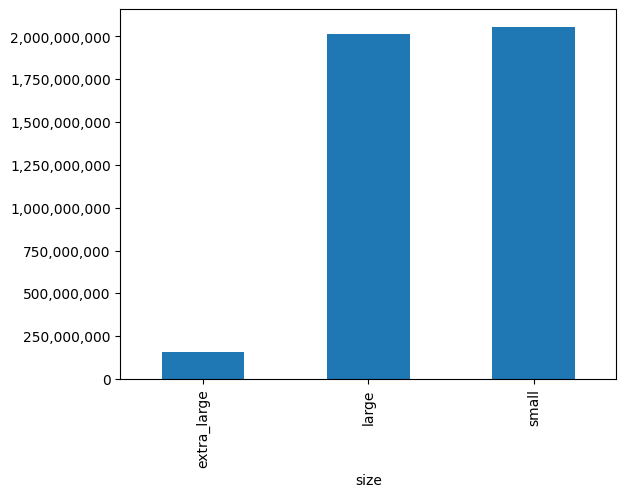

In [93]:
nb_sold_by_size.plot(kind='bar')
unfuck_axis('y')

In [94]:
# Reset matplotlib formatting options
# plt.style.use('default')

### Changes in sales over time

Now it's time for a line plot that shows the total number of avocados sold per date over a span of about three years. First, we'll gather the data:

In [95]:
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()
nb_sold_by_date

date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
                 ...     
2018-02-25    25434002.74
2018-03-04    26834303.05
2018-03-11    26094044.41
2018-03-18    26030618.97
2018-03-25    27480242.92
Name: nb_sold, Length: 169, dtype: float64

Here's the line plot:

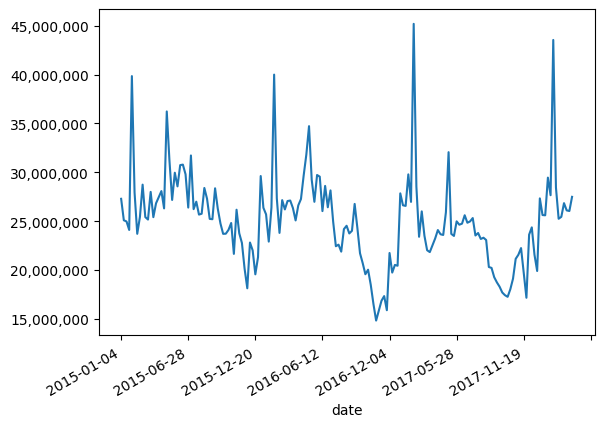

In [96]:
nb_sold_by_date.plot(kind='line')
unfuck_axis('y')
plt.gcf().autofmt_xdate() # Done to prevent overlap in x-axis labels

### Avocado supply and demand

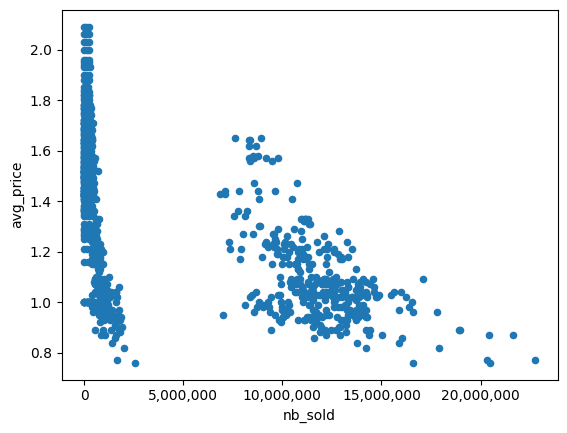

In [97]:
avocados.plot(x='nb_sold', y='avg_price', kind='scatter')
unfuck_axis('x')

In [101]:
avocados[avocados['nb_sold'] < 5_000_000]

,date,type,year,avg_price,size,nb_sold
169,2015-12-27,organic,2015,1.52,small,89709.92
170,2015-12-20,organic,2015,1.53,small,93849.30
171,2015-12-13,organic,2015,1.43,small,91837.92
172,2015-12-06,organic,2015,1.52,small,90203.21
173,2015-11-29,organic,2015,1.50,small,79215.51
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01
